### Αυτό το αρχείο python notebook έχει ως σκοπό την καλύτερη κατανόηση του dataset και δεν λύνει κάποιο από τα ερωτήματα της εργασίας

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

path=r"C:\Unipi-CS\5ο εξάμηνο\Αναγνώριση Προτύπων\project\Data\original dataset\crimes.csv"

dataset=pd.read_csv(path)

### Τα χαρακτηριστικά του dataset

In [17]:
dataset.columns

Index(['incident_id', 'hour_float', 'latitude', 'longitude', 'victim_age',
       'temp_c', 'humidity', 'dist_precinct_km', 'pop_density', 'weapon_code',
       'scene_type', 'weather', 'vic_gender', 'split', 'killer_id'],
      dtype='object')

### Το μέγεθος του αλλά και το μέγεθος των υποσυνόλων του 

In [18]:
print(f"Full dataset :"+str(len(dataset)))
print(f"Train dataset :"+str(len(dataset[dataset["split"]=="TRAIN"])))
print(f"Val dataset :"+str(len(dataset[dataset["split"]=="VAL"])))
print(f"Test dataset :"+str(len(dataset[dataset["split"]=="TEST"])))

Full dataset :4800
Train dataset :2636
Val dataset :958
Test dataset :1206


### Θα ελεγχθεί πόσο balanced είναι το dataset συνολικά αλλά και ανά κατηγορία

C:\Users\alexi\AppData\Local\Temp\ipykernel_24812\1553126704.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.02, 1, 0.96])
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128298 (\N{HOCHO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing 

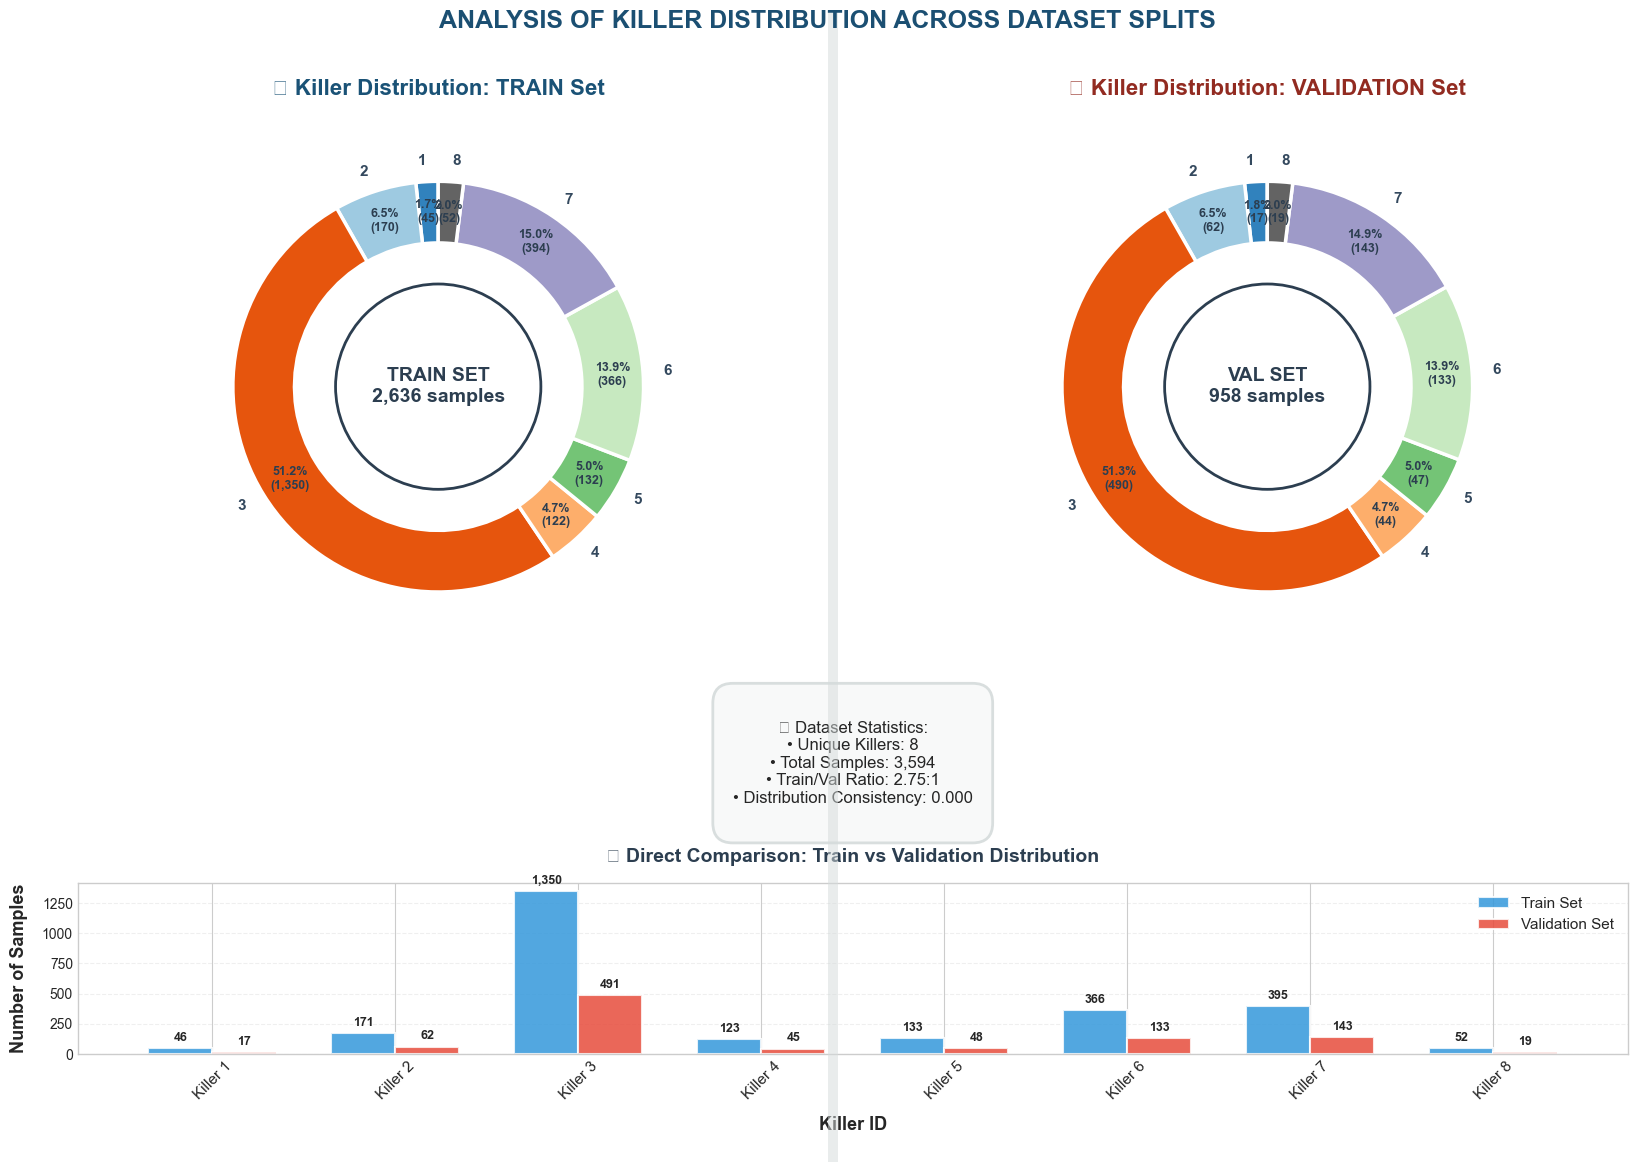

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch


train_counts = dataset[dataset["split"] == "TRAIN"]["killer_id"].value_counts().sort_index()
val_counts = dataset[dataset["split"] == "VAL"]["killer_id"].value_counts().sort_index()


plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(20, 12))


gs = fig.add_gridspec(3, 2, height_ratios=[3, 0.5, 1], hspace=0.3, wspace=0.15)

cmap = plt.cm.tab20c
colors = cmap(np.linspace(0, 0.8, len(train_counts)))


ax1 = fig.add_subplot(gs[0, 0], aspect='equal')
wedges1, texts1, autotexts1 = ax1.pie(
    train_counts, 
    labels=train_counts.index, 
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*train_counts.sum()):,})',
    startangle=90, 
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2.5),
    pctdistance=0.85,
    textprops=dict(fontsize=9, weight='bold')
)


centre_circle1 = plt.Circle((0,0), 0.5, fc='white', linewidth=2, edgecolor='#2C3E50')
ax1.add_artist(centre_circle1)


total_train = train_counts.sum()
ax1.text(0, 0, f'TRAIN SET\n{total_train:,} samples', 
         ha='center', va='center', 
         fontsize=14, fontweight='bold', 
         color='#2C3E50')

ax1.set_title("🔪 Killer Distribution: TRAIN Set", 
              fontsize=16, fontweight='bold', pad=25, color='#1A5276')


ax2 = fig.add_subplot(gs[0, 1], aspect='equal')
wedges2, texts2, autotexts2 = ax2.pie(
    val_counts, 
    labels=val_counts.index, 
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*val_counts.sum()):,})',
    startangle=90, 
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2.5),
    pctdistance=0.85,
    textprops=dict(fontsize=9, weight='bold')
)

centre_circle2 = plt.Circle((0,0), 0.5, fc='white', linewidth=2, edgecolor='#2C3E50')
ax2.add_artist(centre_circle2)

total_val = val_counts.sum()
ax2.text(0, 0, f'VAL SET\n{total_val:,} samples', 
         ha='center', va='center', 
         fontsize=14, fontweight='bold', 
         color='#2C3E50')

ax2.set_title("🎯 Killer Distribution: VALIDATION Set", 
              fontsize=16, fontweight='bold', pad=25, color='#922B21')


for autotext in autotexts1 + autotexts2:
    autotext.set_color('#2C3E50') 
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

for text in texts1 + texts2:
    text.set_fontsize(11)
    text.set_fontweight('semibold')
    text.set_color('#34495E')


stats_text = f"""
📊 Dataset Statistics:
• Unique Killers: {len(train_counts)}
• Total Samples: {total_train + total_val:,}
• Train/Val Ratio: {total_train/total_val:.2f}:1
• Distribution Consistency: {(train_counts/train_counts.sum() - val_counts/val_counts.sum()).abs().mean():.3f}
"""
ax_stats = fig.add_subplot(gs[1, :])
ax_stats.axis('off')
ax_stats.text(0.5, 0.5, stats_text, 
              ha='center', va='center', fontsize=12, 
              bbox=dict(boxstyle="round,pad=1.2", 
                        facecolor='#F8F9F9', 
                        edgecolor='#D5DBDB', 
                        linewidth=2,
                        alpha=0.9),
              fontweight='medium')


ax_compare = fig.add_subplot(gs[2, :])

x = np.arange(len(train_counts))
width = 0.35


bars1 = ax_compare.bar(x - width/2, train_counts.values, width, 
                       label='Train Set', color='#3498DB', alpha=0.85,
                       edgecolor='white', linewidth=1.5)
bars2 = ax_compare.bar(x + width/2, val_counts.values, width, 
                       label='Validation Set', color='#E74C3C', alpha=0.85,
                       edgecolor='white', linewidth=1.5)


def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax_compare.annotate(f'{height:,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

autolabel(bars1)
autolabel(bars2)

ax_compare.set_xlabel('Killer ID', fontsize=13, fontweight='bold', labelpad=10)
ax_compare.set_ylabel('Number of Samples', fontsize=13, fontweight='bold', labelpad=10)
ax_compare.set_xticks(x)
ax_compare.set_xticklabels([f'Killer {k}' for k in train_counts.index], 
                          rotation=45, fontsize=11, fontweight='medium')
ax_compare.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax_compare.set_title('📈 Direct Comparison: Train vs Validation Distribution', 
                     fontsize=14, fontweight='bold', pad=15, color='#2C3E50')

ax_compare.grid(True, axis='y', alpha=0.3, linestyle='--')


plt.suptitle('ANALYSIS OF KILLER DISTRIBUTION ACROSS DATASET SPLITS', 
             fontsize=18, fontweight='bold', y=0.98, color='#1B4F72')


fig.patches.extend([plt.Rectangle((0.5, 0.02), 0.005, 0.96, 
                                  transform=fig.transFigure, 
                                  facecolor='#D5DBDB', 
                                  linewidth=0, 
                                  alpha=0.5)])

plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()